In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_notas = pd.read_csv("data/ratings.csv")
df_notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
df_notas.shape

(100836, 4)

In [4]:
df_notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
df_notas.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_notas['nota'].min()

0.5

<Axes: ylabel='Frequency'>

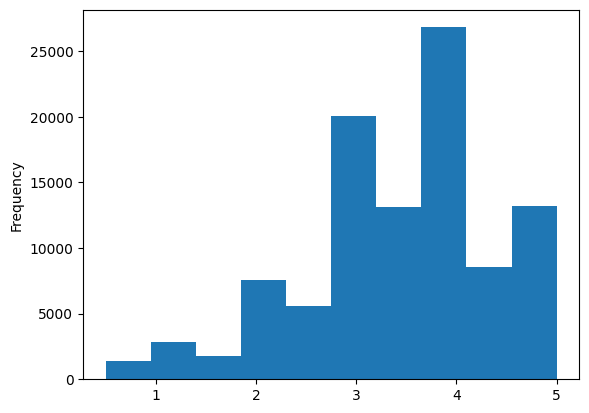

In [6]:
df_notas['nota'].plot(kind='hist')

In [7]:
mediana = df_notas['nota'].median()
media = df_notas['nota'].mean()
print(mediana, media)

3.5 3.501556983616962


In [8]:
df_notas[['nota']].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

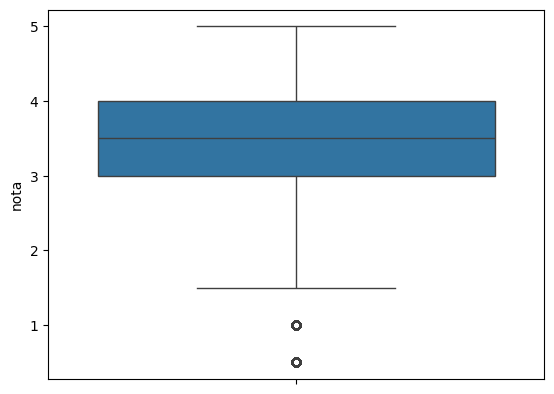

In [9]:
sns.boxplot(df_notas['nota'])

In [10]:
df_movies = pd.read_csv("data/movies.csv")
df_movies.columns = ["filmeId", "titulo", "generos"]
df_movies.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
id = df_movies.loc[df_movies['titulo'] == "Toy Story (1995)", 'filmeId']
df_notas.loc[df_notas['filmeId'] == id[0], 'nota'].mean()

3.9209302325581397

In [12]:
medias_por_filme = df_notas.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

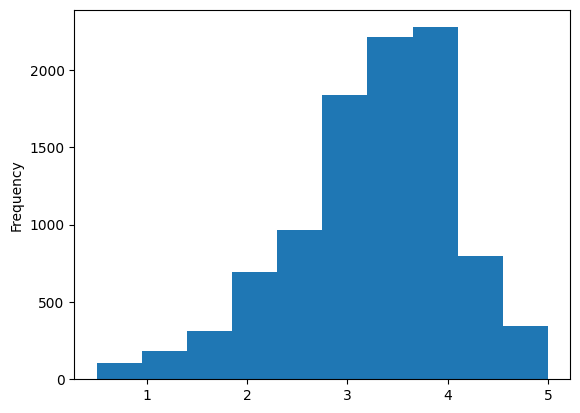

In [13]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

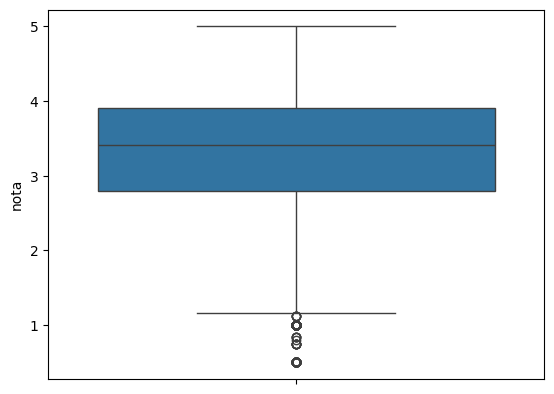

In [14]:
sns.boxplot(medias_por_filme)

Text(-3.6805555555555554, 0.5, 'Quantidade')

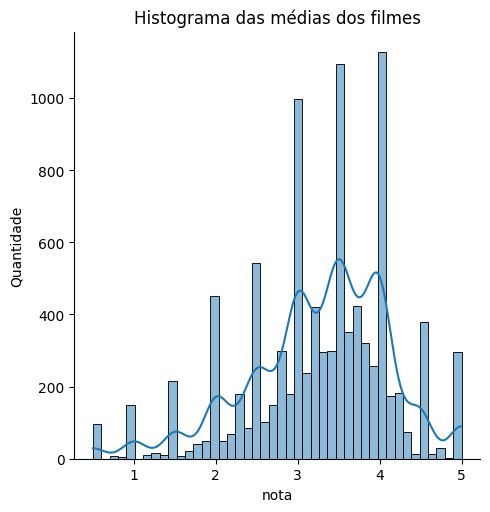

In [15]:
sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das médias dos filmes")
plt.ylabel("Quantidade")

In [16]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


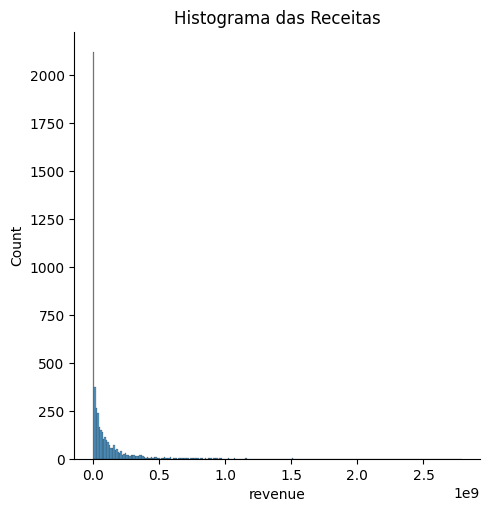

In [17]:
sns.displot(tmdb['revenue'])
plt.title("Histograma das Receitas")
plt.show()

Text(0, 0.5, 'Número de Filmes')

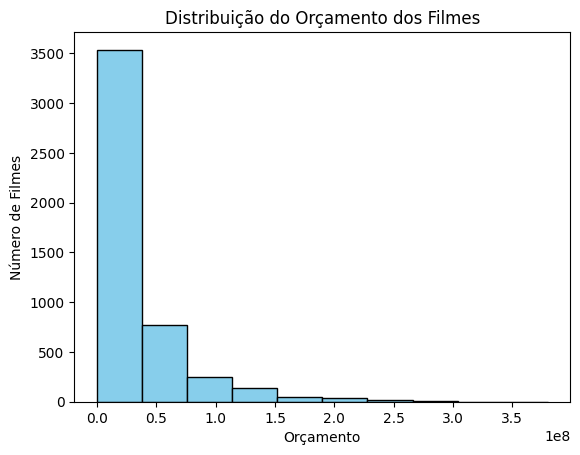

In [18]:
plt.hist(tmdb['budget'], bins=10, color='skyblue', edgecolor='black')  # Histograma com 5 bins
plt.title('Distribuição do Orçamento dos Filmes')
plt.xlabel('Orçamento')
plt.ylabel('Número de Filmes')

In [19]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [20]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


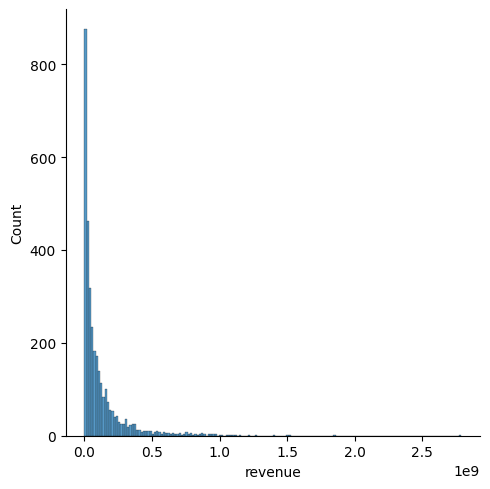

In [21]:
faturamento = tmdb.query('revenue > 0')
sns.displot(faturamento['revenue'])

In [22]:
tmdb['original_language'].value_counts().index


Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [23]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [24]:
contagem_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_lingua = contagem_lingua.rename(columns={'count': 'total'})

Text(0.5, 0, 'Lingua')

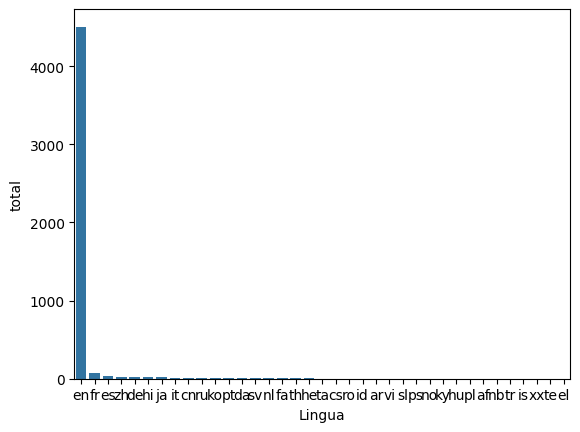

In [25]:
sns.barplot(data=contagem_lingua, x='original_language', y='total')
plt.xlabel('Lingua')

# NAO SE USA GRAFICO DE PIZZA

Text(0, 0.5, 'Contagem')

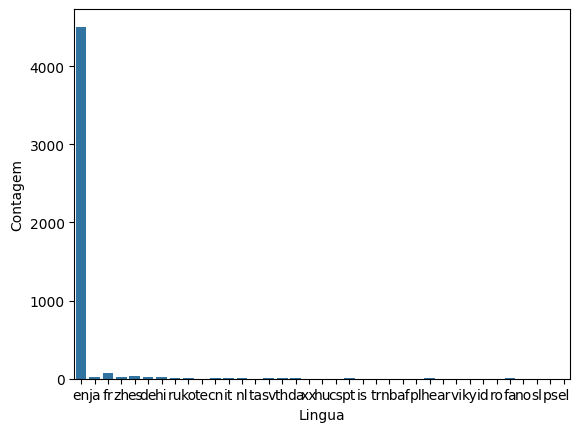

In [26]:
sns.countplot(data=tmdb, x='original_language')
plt.xlabel('Lingua')
plt.ylabel('Contagem')

<Axes: ylabel='total'>

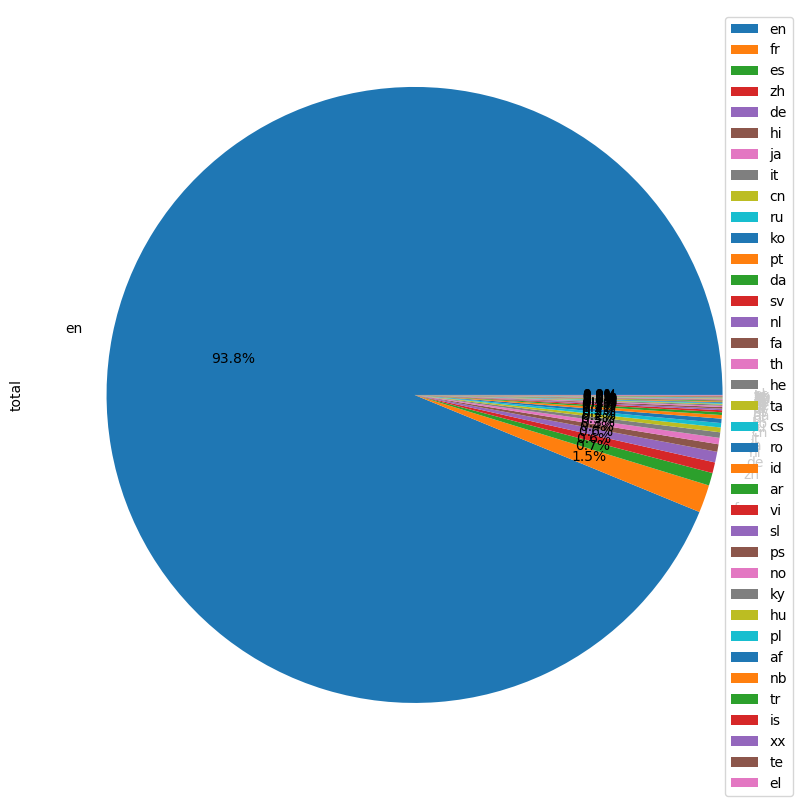

In [27]:
contagem_lingua.plot(kind='pie', y='total', labels=contagem_lingua['original_language'], autopct='%1.1f%%', figsize=(10, 10))

In [28]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_ingles = total_por_lingua.loc['en']
total_resto = total_geral - total_ingles
total_resto

298

In [29]:
dados = {
    "lingua" : ["ingles", "outros"], 
    "total" : [total_ingles, total_resto]
 }
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

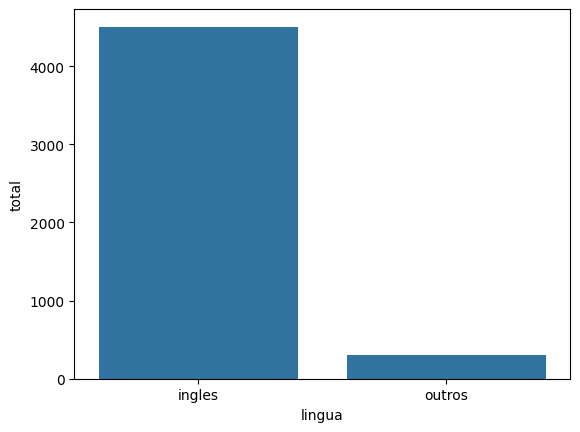

In [30]:
sns.barplot(data=dados, x='lingua', y='total')

In [47]:
total_outros_filmes = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_outros_filmes.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

Text(0, 0.5, 'Contagem')

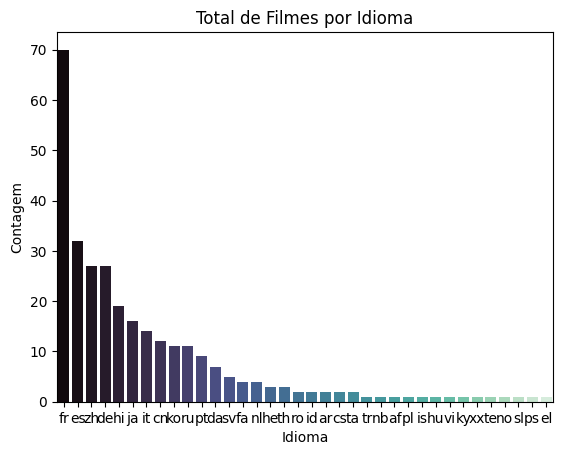

In [40]:
sns.countplot(data=tmdb.query('original_language != "en"'), 
              x='original_language', 
              palette="mako",
              hue_order=total_outros_filmes.index,
              order=total_outros_filmes.index, 
              hue='original_language')
plt.title('Total de Filmes por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Contagem')


In [48]:
tmdb.query('original_language != "en"')['original_language'].value_counts(normalize=True)
total_outros_filmes.head()

original_language
fr    70
es    32
zh    27
de    27
hi    19
Name: count, dtype: int64

Text(0, 0.5, 'Porcentagem')

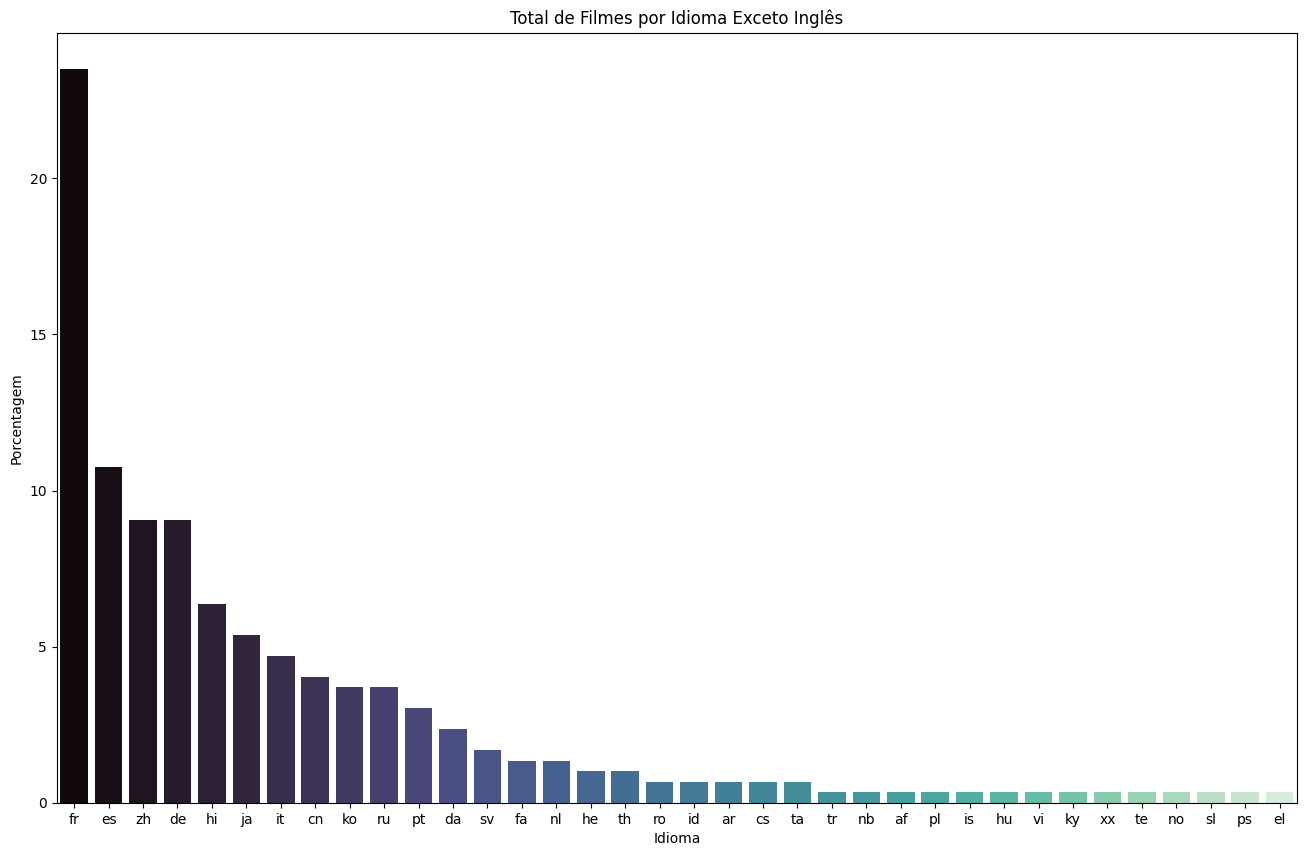

In [55]:
plt.figure(figsize=(16, 10))
sns.countplot(data=tmdb.query('original_language != "en"'), 
              x='original_language', 
              palette="mako",
              stat='percent',
              hue_order=total_outros_filmes.index,
              order=total_outros_filmes.index, 
              hue='original_language')

plt.title('Total de Filmes por Idioma Exceto Inglês')
plt.xlabel('Idioma')
plt.ylabel('Porcentagem')

In [56]:
df_movies.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [59]:
notas_toy_story = df_notas.query('filmeId==1')['nota']
notas_jumanji = df_notas.query('filmeId==2')['nota']

media_toy_story = notas_toy_story.mean()
media_jumanji = notas_jumanji.mean()

print(f'Media Toy Story: {media_toy_story}')
print(f'Media Jumanji: {media_jumanji}')

Media Toy Story: 3.9209302325581397
Media Jumanji: 3.4318181818181817


In [60]:
media_toy_story = notas_toy_story.median()
media_jumanji = notas_jumanji.median()

print(f'Mediana Toy Story: {media_toy_story}')
print(f'Mediana Jumanji: {media_jumanji}')

Mediana Toy Story: 4.0
Mediana Jumanji: 3.5


In [63]:
filme0 =[3.0]*20 #Espalha 0
filme1 = [3.5]*10 + [2.5] *10 #Espalha 1
filme2 = [5]*10 + [1] * 10 #Espalha 2

Calcular o desvio padrao 

In [64]:
std_filme0 = np.std(filme0)
std_filme1 = np.std(filme1)
std_filme2 = np.std(filme2)

print("Standart deviation of filme0:", std_filme0)
print("Standart deviation of filme1:", std_filme1)
print("Standart deviation of filme2:", std_filme2)

Standart deviation of filme0: 0.0
Standart deviation of filme1: 0.5
Standart deviation of filme2: 2.0


Text(0.5, 0, 'Filme')

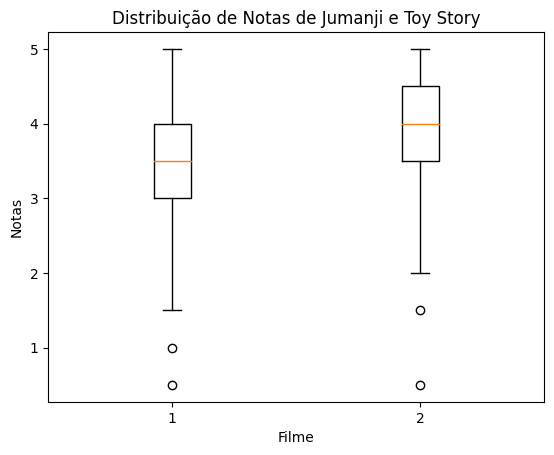

In [66]:
plt.boxplot([notas_jumanji, notas_toy_story])
plt.title("Distribuição de Notas de Jumanji e Toy Story")
plt.ylabel("Notas")
plt.xlabel("Filme")

Text(0.5, 1.0, 'Distribuição de Notas de Jumanji e Toy Story')

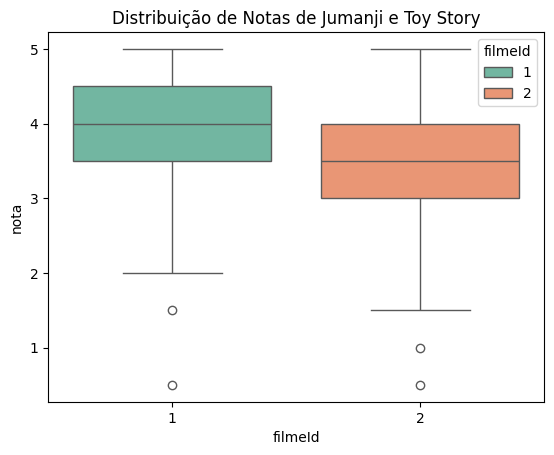

In [77]:
sns.boxplot(data=df_notas.query('filmeId in [1,2]'), 
            x='filmeId', 
            y='nota',
            palette="Set2",
            hue="filmeId",)
plt.title("Distribuição de Notas de Jumanji e Toy Story")